#### [HOME](../README.md) | [NEXT](1.raw_course_specification.ipynb)

---

# OOP Polynomial Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Polynomial Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [97]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#### Step 2 - Import Data

In [98]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


#### Step 3: Instantiate a LinearRegression Object

In [99]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [104]:
X_insects = insects[['continent', 'latitude', 'sex']]
y_insects = insects['wingsize']

# Create a 4 degree polynomial feature
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(X_insects)

insects_regression.fit(poly_features, y_insects)

LinearRegression()

#### Step 5: Predict Values

In [101]:
wing_size_predictions = insects_regression.predict(poly_features)

#### Step 5: Plot the Predictions

Text(0, 0.5, 'Predicted Wing Span')

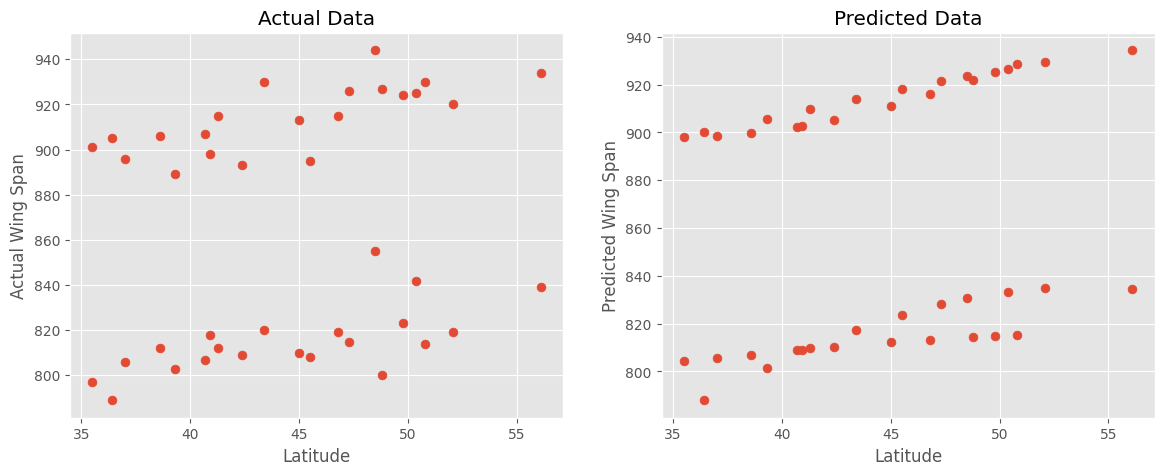

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

#### Step 6: Evaluate The Model

In [103]:
table = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': wing_size_predictions,
    'Loss': y_insects - insects_regression.predict(poly_features).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

    Target  Predicted result   Loss
0      901        897.883780   3.12
1      896        898.455644  -2.46
2      906        899.745099   6.25
3      907        902.441115   4.56
4      898        902.754594  -4.75
5      893        905.405509 -12.41
6      913        911.184818   1.82
7      915        915.995519  -1.00
8      927        922.044474   4.96
9      924        925.325071  -1.33
10     930        928.764375   1.24
11     905        900.214113   4.79
12     889        905.791195 -16.79
13     915        909.746046   5.25
14     930        913.903346  16.10
15     895        917.983175 -22.98
16     926        921.355127   4.64
17     944        923.511340  20.49
18     925        926.731793  -1.73
19     920        929.367933  -9.37
20     934        934.395931  -0.40
21     797        804.494431  -7.49
22     806        805.703664   0.30
23     812        807.043143   4.96
24     807        808.818152  -1.82
25     818        808.985504   9.01
26     809        810.216657